In [1]:
import pandas as pd
import numpy as np
import requests

base_url = 'http://www.wamis.go.kr:8080/wamis/openapi/wkd/mn_dtdata?'

damcd = '1012110'

startdt1 = '20100101'
enddt1 = '20121231'

startdt2 = '20130101'
enddt2 = '20151231'

startdt3 = '20160101'
enddt3 = '20181231'

output = 'xml'
key = '873e7a8e107aa8367ec3ca417d82aea7e36e550495'

url1 = base_url + '&damcd=' + damcd + '&startdt=' + startdt1 + '&enddt=' + enddt1 + '&output=' + output + '&key=' + key
url2 = base_url + '&damcd=' + damcd + '&startdt=' + startdt2 + '&enddt=' + enddt2 + '&output=' + output + '&key=' + key
url3 = base_url + '&damcd=' + damcd + '&startdt=' + startdt3 + '&enddt=' + enddt3 + '&output=' + output + '&key=' + key
print(url1)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

http://www.wamis.go.kr:8080/wamis/openapi/wkd/mn_dtdata?&damcd=1012110&startdt=20100101&enddt=20121231&output=xml&key=873e7a8e107aa8367ec3ca417d82aea7e36e550495


/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_20954/3746729637.py:26: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote


class xmltodf:
    def __init__(self,url):
        self.url = url
        self.date = []
        self.wl = []
        self.income = []
        self.rain = []
        
    def run(self):
        
        response = requests.get(self.url)
        content = response.text
        
        xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
        
        obsymd = xml_obj.findAll('obsymd')
        rwl = xml_obj.findAll('rwl')
        iqty = xml_obj.findAll('iqty')
        rf = xml_obj.findAll('rf')
        
        date = []
        wl = []
        income = []
        rain = []
        
        for i in obsymd: #시간데이터
            date.append(i.text)
        for i in rwl: #수위데이터
            wl.append(float(i.text))
        for i in iqty: #유입량데이터
            income.append(float(i.text))
        for i in rf: #강수량데이터
            rain.append(float(i.text))
        
        self.date = date
        self.wl = wl
        self.income = income
        self.rain = rain
        
        sub_dict = {'date' : date,
                   'wl' : wl,
                   'income' : income,
                   'rain' : rain}
        df = pd.DataFrame(sub_dict)
        self.df = df
            
           

In [3]:
tmp1 = xmltodf(url1)
tmp2 = xmltodf(url2)
tmp3 = xmltodf(url3)

tmp1.run()
tmp2.run()
tmp3.run()

df1 = tmp1.df
df2 = tmp2.df
df3 = tmp3.df

df3.head()

,date,wl,income,rain
0,20160101,172.71,14.5,0.0
1,20160102,172.73,14.5,0.0
2,20160103,172.75,14.5,0.0
3,20160104,172.77,14.5,0.0
4,20160105,172.79,14.5,0.0


In [4]:
df = pd.concat([df1,df2,df3])
df.reset_index(inplace=True, drop=True)
df

,date,wl,income,rain
0,20100101,174.82,2.8,0.0
1,20100102,174.68,3.0,4.2
2,20100103,174.54,3.6,0.1
3,20100104,174.41,8.7,7.7
4,20100105,174.27,3.7,0.1
...,...,...,...,...
3281,20181227,182.97,5.5,0.0
3282,20181228,182.87,5.7,0.0
3283,20181229,182.77,5.7,0.0
3284,20181230,182.68,11.7,0.0


In [5]:
#date type 날짜로 변환시키기.
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3286 non-null   datetime64[ns]
 1   wl      3286 non-null   float64       
 2   income  3286 non-null   float64       
 3   rain    3286 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 102.8 KB


Text(0.5, 1.0, 'Dam Water Level')

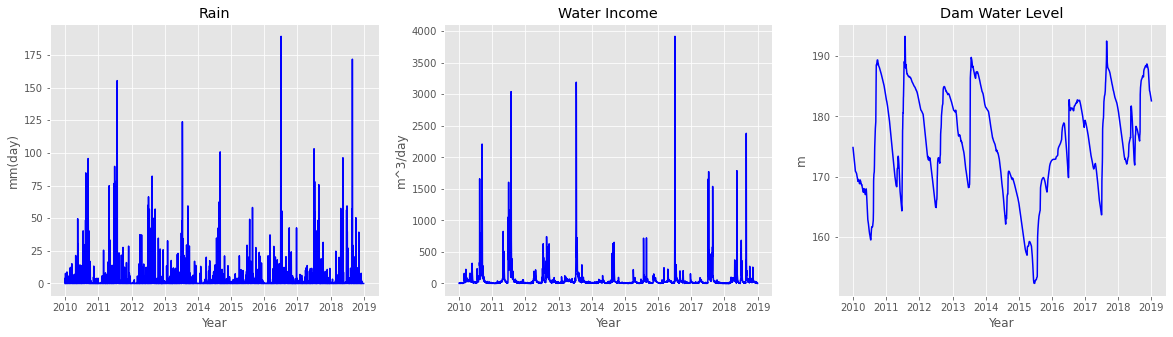

In [7]:
#간단하게 출력
#subplot활용
#한화면에 다중 그래프

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(df['date'],df['rain'],color='blue')
plt.ylabel('mm(day)')
plt.xlabel('Year')
plt.title('Rain')

plt.subplot(1,3,2)
plt.plot(df['date'],df['income'],color='blue')
plt.ylabel('m^3/day')
plt.xlabel('Year')
plt.title('Water Income')

plt.subplot(1,3,3)
plt.plot(df['date'],df['wl'], color='blue')
plt.ylabel('m')
plt.xlabel('Year')
plt.title('Dam Water Level')

In [8]:
import datetime as dt
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,date,wl,income,rain,year,month
0,2010-01-01,174.82,2.8,0.0,2010,1
1,2010-01-02,174.68,3.0,4.2,2010,1
2,2010-01-03,174.54,3.6,0.1,2010,1
3,2010-01-04,174.41,8.7,7.7,2010,1
4,2010-01-05,174.27,3.7,0.1,2010,1


In [9]:
df_gr = df.groupby(['year','month']).sum()[['rain']]

df_gr_m = df.groupby('month').sum()[['rain']]

df_gr_y = df.groupby('year').sum()[['rain']]


<AxesSubplot:xlabel='month'>

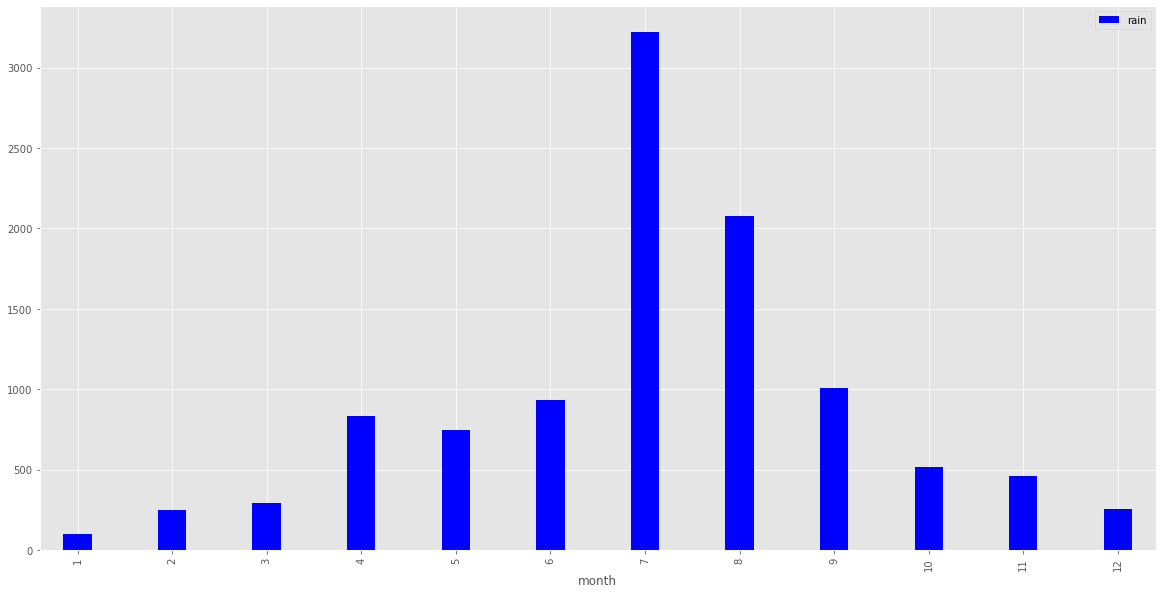

In [10]:
plt.style.use('ggplot')
df_gr_m.plot(kind='bar', color='blue', width=0.3, figsize=(20,10))


<AxesSubplot:xlabel='year'>

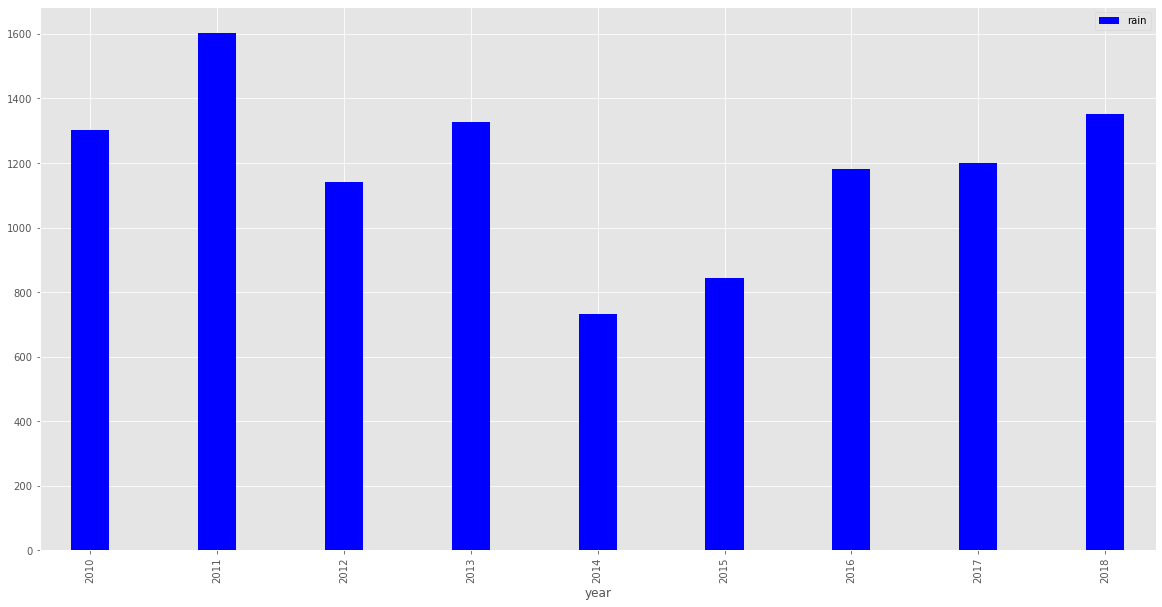

In [11]:
df_gr_y.plot(kind='bar', color='blue', width=0.3, figsize=(20,10))

In [12]:
df.set_index('date', inplace=True)

Text(0.5, 0, 'Date')

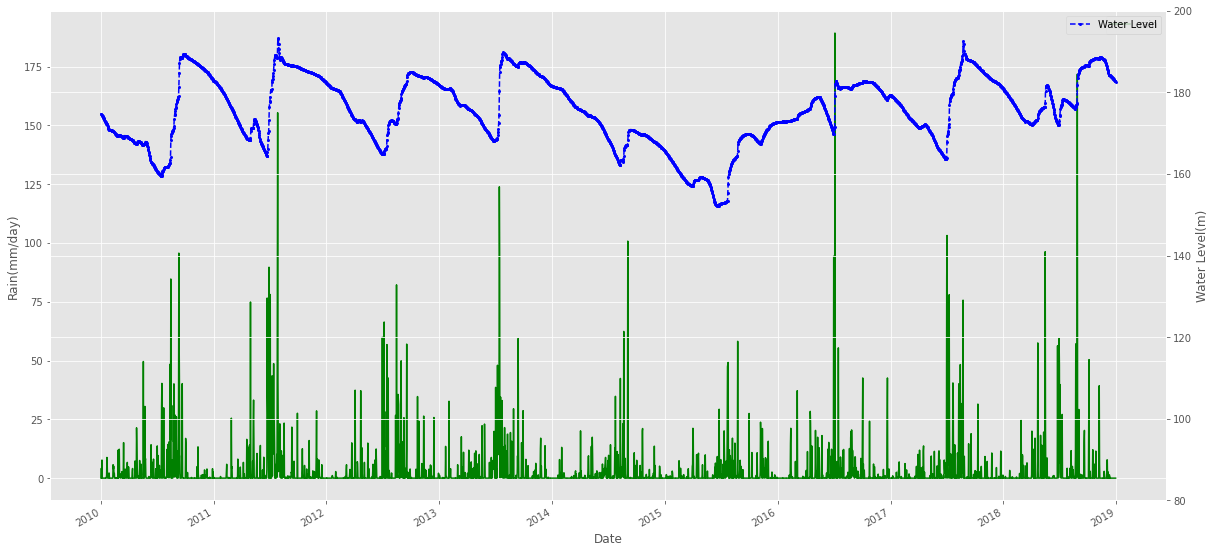

In [13]:
#이중축 구조
#twinx()

ax1 = df[['rain']].plot(figsize=(20,10),color='green')
ax2 = ax1.twinx()
ax2.plot(df.index, df.wl, ls='--', marker='o', markersize=2, color='blue', label='Water Level')
ax2.set_ylim(80,200)
ax2.legend()
ax1.set_ylabel('Rain(mm/day)')
ax2.set_ylabel('Water Level(m)')
ax1.set_xlabel('Date')

In [14]:
df.head()

,wl,income,rain,year,month
date,,,,,
2010-01-01,174.82,2.8,0.0,2010,1
2010-01-02,174.68,3.0,4.2,2010,1
2010-01-03,174.54,3.6,0.1,2010,1
2010-01-04,174.41,8.7,7.7,2010,1
2010-01-05,174.27,3.7,0.1,2010,1


In [15]:
df['delta_wl'] = (df['wl'] - df['wl'].shift(1)) / df['wl']
df.fillna(0, inplace=True)
df.head()

,wl,income,rain,year,month,delta_wl
date,,,,,,
2010-01-01,174.82,2.8,0.0,2010,1,0.000000
2010-01-02,174.68,3.0,4.2,2010,1,-0.000801
2010-01-03,174.54,3.6,0.1,2010,1,-0.000802
2010-01-04,174.41,8.7,7.7,2010,1,-0.000745
2010-01-05,174.27,3.7,0.1,2010,1,-0.000803


Text(0.5, 1.0, 'change_rate with rain')

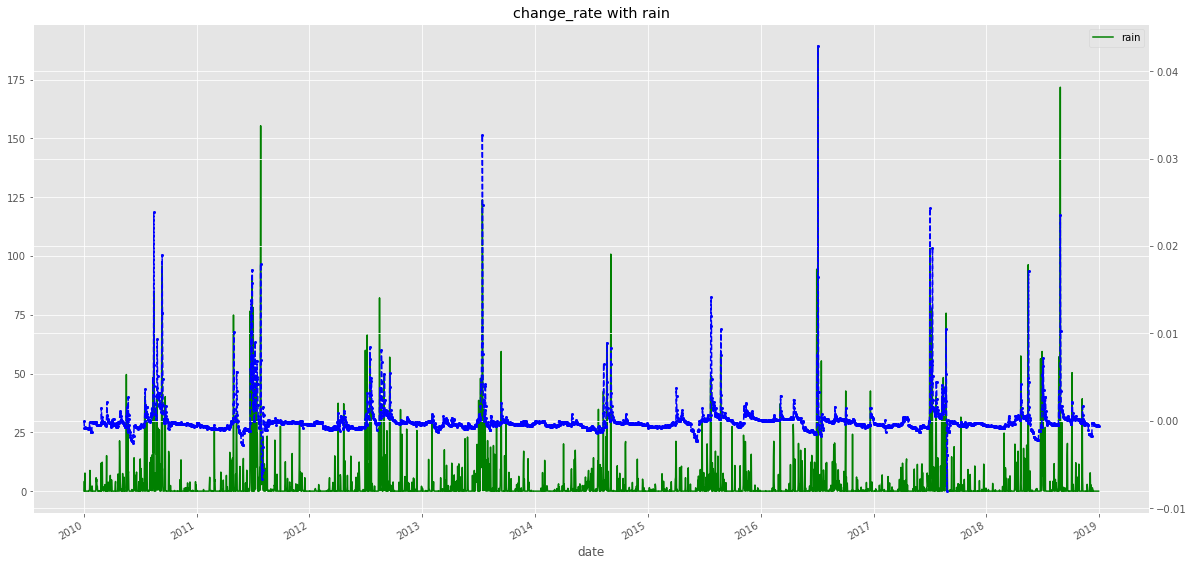

In [16]:
ax1 = df[['rain']].plot(figsize=(20,10),color='green')
ax2 = ax1.twinx()
ax2.plot(df.index, df.delta_wl, ls='--', marker='o', markersize=2, color='blue', label='delta_wl')
plt.title('change_rate with rain')

Text(0.5, 0, 'Date(2010-7)_day')

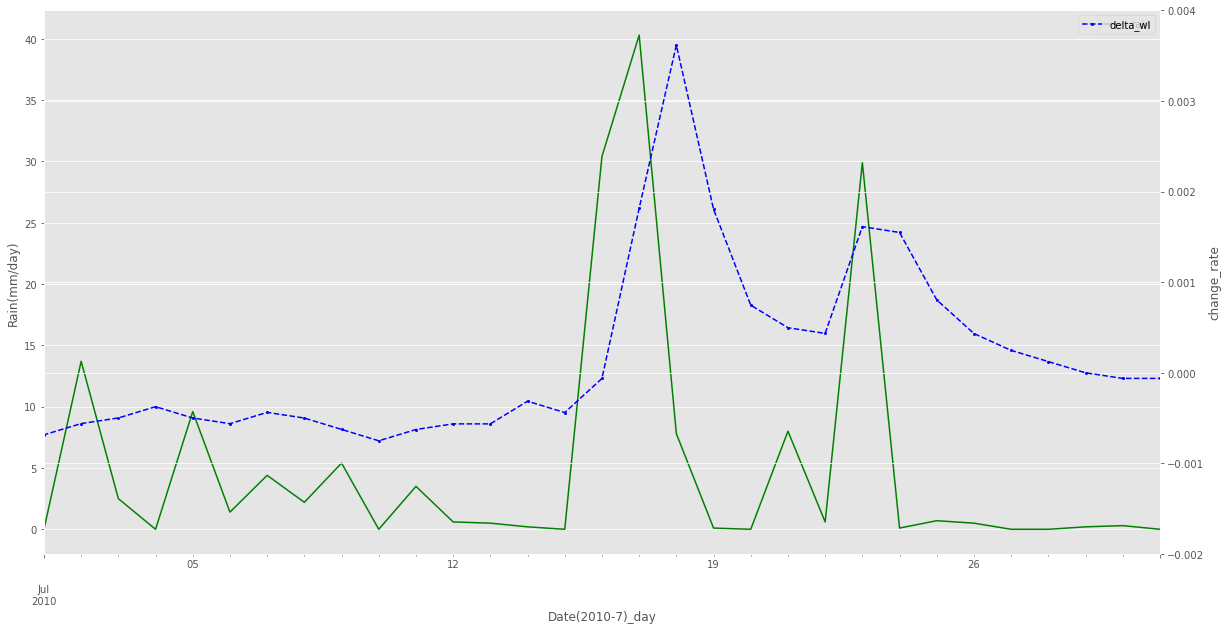

In [17]:
df_7_2010 = df[df['month'] == 7].head(31)

ax1 = df_7_2010[['rain']].plot(figsize=(20,10),color='green')
ax2 = ax1.twinx()
ax2.plot(df.index, df.delta_wl, ls='--', marker='o', markersize=2, color='blue', label='delta_wl')
ax2.set_ylim(-0.002,0.004)
ax2.legend()
ax1.set_ylabel('Rain(mm/day)')
ax2.set_ylabel('change_rate')
ax1.set_xlabel('Date(2010-7)_day')

Text(0.5, 0, 'Date(2011-7)_day')

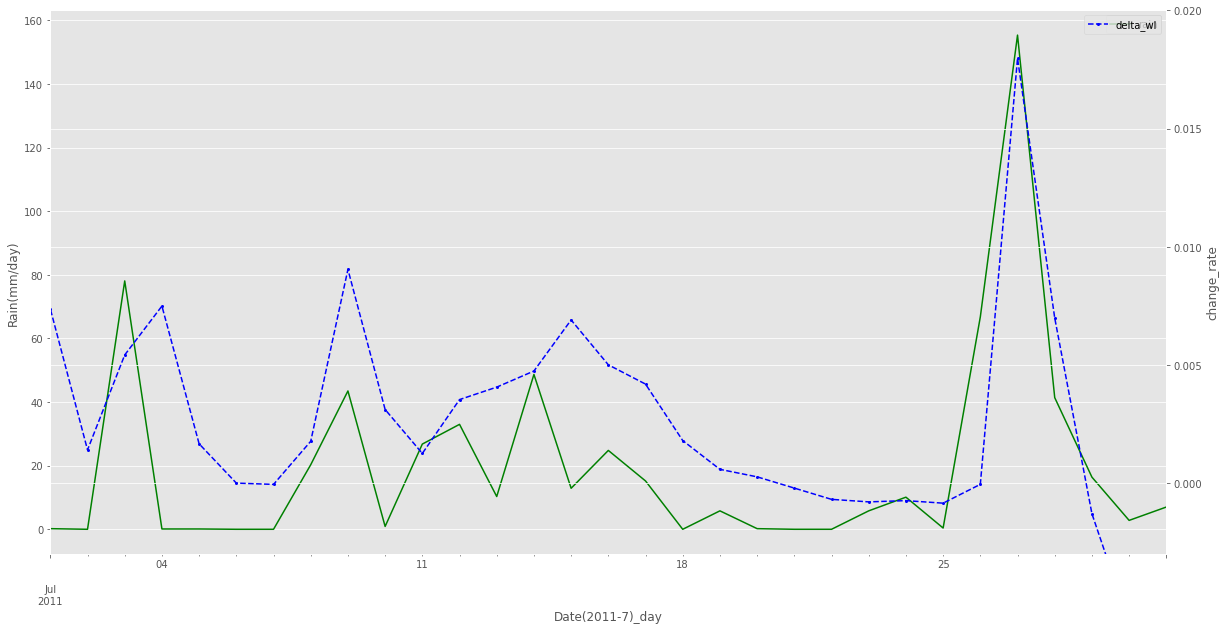

In [18]:
df_7_2011 = df[((df['month'] == 7) & (df['year'] == 2011))]

ax1 = df_7_2011[['rain']].plot(figsize=(20,10),color='green')
ax2 = ax1.twinx()
ax2.plot(df.index, df.delta_wl, ls='--', marker='o', markersize=2, color='blue', label='delta_wl')
ax2.set_ylim(-0.003,0.020)
ax2.legend()
ax1.set_ylabel('Rain(mm/day)')
ax2.set_ylabel('change_rate')
ax1.set_xlabel('Date(2011-7)_day')

In [19]:
df[['rain','delta_wl']].corr()

,rain,delta_wl
rain,1.000000,0.634879
delta_wl,0.634879,1.000000


Text(0.5, 1.0, '비가내리고 비와 (n)day후 수위와 변화량의 상관관계 ')

/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/IPython/core/py

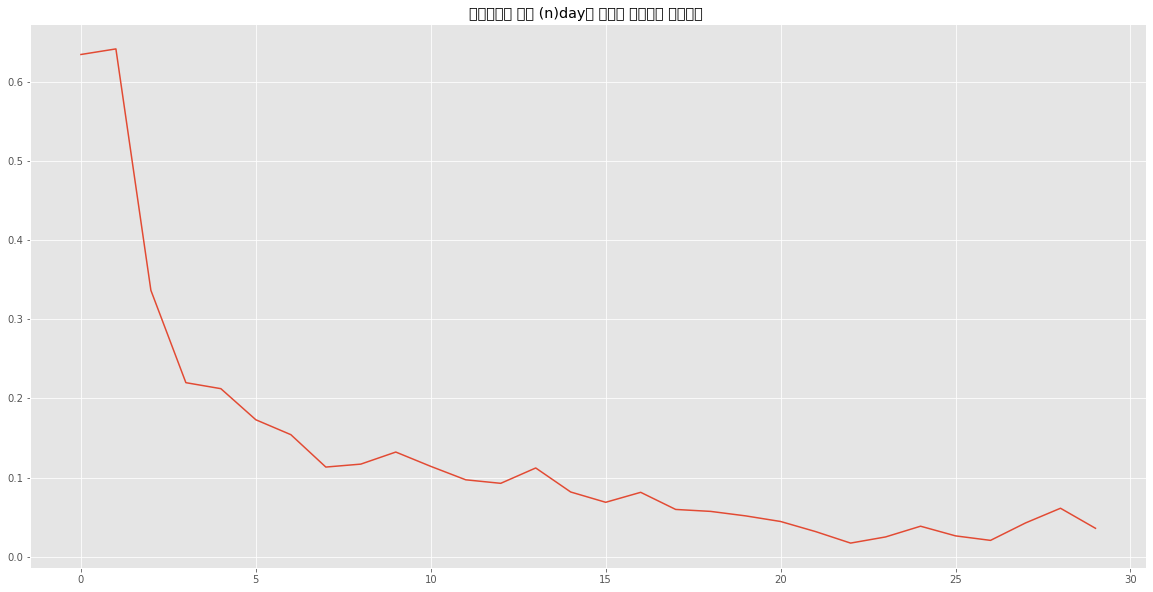

In [20]:
list_tmp = []
for i in range(30):
    df['delta_wl_1day'] = df['delta_wl'].shift(-i)
    list_tmp.append(df[['rain', 'delta_wl_1day']].corr().iloc[1,0])

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(list_tmp)
plt.title('비가내리고 비와 (n)day후 수위와 변화량의 상관관계 ')

83.99999999999996
